## Simple Linear Regression ##

In [38]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

In [39]:
import statsmodels.api as sm # For OLS (Ordinary Least Squares) Regression

In [40]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [41]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [42]:
# Define the linear regression model
model=LinearRegression()

In [43]:
# train the model
model.fit(X,Y)

LinearRegression()

In [44]:
# Finding the slope and intercept of the line
print("slope: ",model.coef_)
print("Intercept: ",model.intercept_)

slope:  [4.96549814]
Intercept:  27.430065779800533


In [45]:
m=model.coef_[0] # slope of the line
c=model.intercept_ # intercept of the line (where the line crosses the y-axis) 
print(m)
print(c)

4.965498141580592
27.430065779800533


In [46]:
print(f"Equation of the line: Y= {m:.2f} X + {c:.2f}")

Equation of the line: Y= 4.97 X + 27.43


In [47]:
# predicting the values using the model
y_pred=model.predict(X)

## MODEL EVALUATION METRICS ##

In [48]:
mse= mean_squared_error(Y, y_pred)
print("MSE: ",mse)

MSE:  11.751853009895182


In [49]:
mae= mean_absolute_error(Y, y_pred)
print("MAE: ",mae)

MAE:  2.868273465573678


In [50]:
rmse=root_mean_squared_error(Y, y_pred)
print("RMSE: ",rmse)

RMSE:  3.428097578817613


In [51]:
r2 = r2_score(Y, y_pred)
print("R2_score(R-squared): ",r2)

R2_score(R-squared):  0.9453822032109368


In [53]:
#5.Adjusted R-squared (R2_adj) - Adjusted for the number of predictors, better for multiple regression
n=len(Y) #Number of observations
p=1 #Number of independent variables (Experience)
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f'Adjusted R-squared: {adj_r2:.2f}')

Adjusted R-squared: 0.94


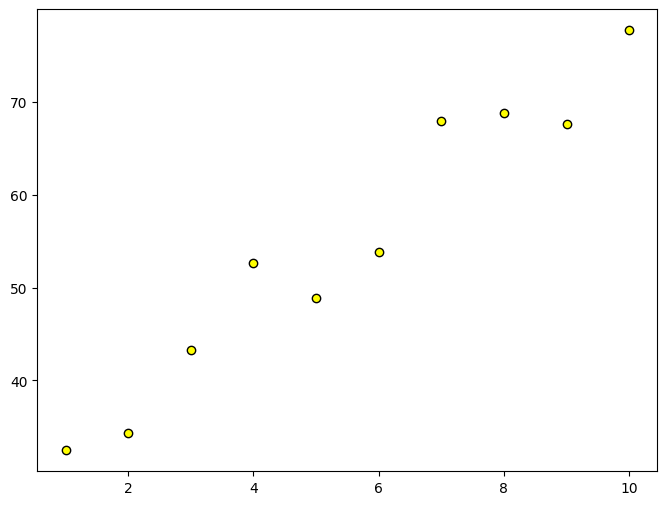

In [68]:
# scatter plot for the actual data
plt.figure(figsize=(8,6))
plt.scatter(X,Y,color='yellow',edgecolor='black')
plt.show()

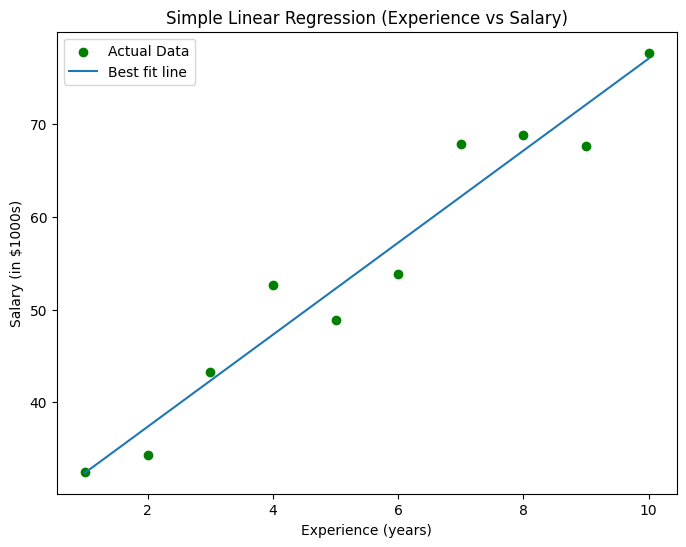

In [72]:
# scatter plot for the actual data
plt.figure(figsize=(8,6))
plt.scatter(X,Y,color='green',label="Actual Data")
# best fit line 
plt.plot(X,y_pred,label="Best fit line")
plt.xlabel("Experience (years)")
plt.ylabel("Salary (in $1000s)")
plt.title("Simple Linear Regression (Experience vs Salary)")
plt.legend()
plt.show()

In [74]:
while True:
    try:
        exp=float(input("Enter years of experience to predict the salary:(or -1 to exit) "))
        if exp==-1:
            break
        predicted_sal=model.predict(np.array([[exp]]))[0]
        print(f"Predicted salary for {exp} years of experience: ${predicted_sal:.2f}K")
    except ValueError:
        print("Please enter a valid number")

Enter years of experience to predict the salary:(or -1 to exit)  5


Predicted salary for 5.0 years of experience: $52.26K


Enter years of experience to predict the salary:(or -1 to exit)  -1


## Steps ##

* **Step 1: Import necessary libraries**
* **Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)**
* **Step 3: Creating a Linear Regression Model**
* **Step 4: Training the model using data set**
* **Step 5: Get the values of slope and intercept from the trained model**
* **Step 6: Display the equation of the line**
* **Step 7: Predit values using the model**
* **Step 8: Plot the regression line**
* **step 9: Prediction Features**
 

In [75]:
import statsmodels.api as sm  # For OLS Regression
from sklearn.preprocessing import PolynomialFeatures
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)

degree = 2  # You can change this for higher degrees

poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer

X_poly = poly.fit_transform(X)  # Transforming X to polynomial features
 
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)

degree = 2  # You can change this for higher degrees

poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer

X_poly = poly.fit_transform(X)  # Transforming X to polynomial features
 

In [76]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:10:55   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)
